# Isochrone Testing Notebook

Notebook used for testing features in the isochrone package and get used to what will be required in data analysis . 

In [1]:
from isochrones.mist import MIST_Isochrone

mist = MIST_Isochrone()

pars = [353, 9.78, -1.24]  # eep, log(age), feh -> taken parameters. 
mist.interp_value(pars, ['mass', 'radius', 'Teff'])

PyMultiNest not imported.  MultiNest fits will not work.


array([7.93829519e-01, 7.91444054e-01, 6.30305932e+03])

In [2]:
# --- Interpolating Apparant Magnitudes -- 
# We give the distance and extinction. 
mist.interp_mag(pars + [200, 0.11], ['K', 'BP', 'RP'])  # Returns Teff, logg, feh, mags

(6303.059322477636,
 4.540738764316164,
 -1.377262817643937,
 array([10.25117074, 11.73997659, 11.06530093]))

## Evolutionary Tracks 

In [75]:
from isochrones.mist import MIST_EvolutionTrack

mist_track = MIST_EvolutionTrack()

pars = [0.794, 353, 0.06]  # mass, eep, feh
mist_track.interp_value(pars, ['mass', 'radius', 'Teff', 'age'])

array([7.93884297e-01, 7.90654387e-01, 5.01757814e+03, 1.00159267e+01])

In [4]:
mist_track.mass(*pars)

array(0.79384375)

In [49]:
df = mist.isochrone(9.53, 0.1).head()  # just show first few rows
print(df.to_string())

       eep   age       feh      mass  initial_mass    radius    density   logTeff         Teff      logg      logL       Mbol    delta_nu        nu_max  phase   dm_deep     J_mag     H_mag     K_mag      G_mag     BP_mag     RP_mag    W1_mag    W2_mag    W3_mag   TESS_mag  Kepler_mag
223  223.0  9.53  0.150280  0.143050      0.143050  0.174516  42.180653  3.477544  3003.536405  5.121475 -2.666895  11.407236  784.166776  20970.010838    0.0  0.004426  9.431466  8.785652  8.559155  12.766112  14.751373  11.522765  8.398324  8.200245  8.032482  11.381237   12.864034
224  224.0  9.53  0.150322  0.147584      0.147584  0.178799  40.087436  3.479902  3019.769652  5.112821 -2.634744  11.326861  764.278510  20469.275694    0.0  0.004735  9.357895  8.713187  8.487450  12.662469  14.612210  11.426132  8.327414  8.129809  7.964879  11.287794   12.755405
225  225.0  9.53  0.150371  0.152520      0.152521  0.183594  37.947213  3.482375  3036.910262  5.103613 -2.600544  11.241360  743.262638  19941.

In [50]:
from isochrones.mist import MIST_EvolutionTrack

mist_track = MIST_EvolutionTrack()
mist_track([0.8, 0.9, 1.0], 350, 0.0, distance=100, AV=0.1).to_string()

'     radius      Mbol       nu_max      logL   logTeff      mass       feh      logg    eep   density  phase  initial_mass    delta_nu         Teff  interpolated      star_age       age   dt_deep     J_mag     H_mag     K_mag      G_mag     BP_mag     RP_mag    W1_mag    W2_mag    W3_mag   TESS_mag  Kepler_mag\n0  0.787407  5.792554  4254.629601 -0.421021  3.707984  0.799894 -0.022828  4.548780  350.0  2.309862    0.0           0.8  180.951611  5104.857422           0.0  8.820835e+09  9.945510  0.014106  9.522214  9.040105  8.972502  10.872155  11.328430  10.258544  8.945414  8.989254  8.921756  10.247984   10.773706\n1  0.888064  5.200732  3622.320906 -0.184293  3.741043  0.899876 -0.014426  4.495440  350.0  1.811345    0.0           0.9  160.622229  5508.624894           0.0  5.978967e+09  9.776626  0.013699  9.058407  8.667003  8.614974  10.224077  10.602879   9.678977  8.593946  8.622577  8.575349   9.671007   10.129692\n2  1.006928  4.675907  3041.107996  0.025637  3.766249  0.99

In [7]:
mist_track.generate([0.81, 0.91, 1.01], 9.51, 0.01)

building irregular age grid: 100%|██████████| 2940/2940 [00:21<00:00, 135.22it/s]


,radius,Mbol,nu_max,logL,logTeff,mass,feh,logg,eep,density,...,RP_mag,W1_mag,W2_mag,W3_mag,TESS_mag,Kepler_mag,distance,AV,initial_feh,requested_age
0,0.750611,5.977047,4787.598310,-0.494819,3.699978,0.809963,0.028094,4.595858,320.808,2.703371,...,5.375416,4.066499,4.117992,4.047535,5.365712,5.887722,10,0,0.01,9.51
1,0.853120,5.324246,3986.671794,-0.233698,3.737424,0.909935,0.021019,4.535170,332.280,2.066927,...,4.731979,3.684034,3.718112,3.670736,4.725020,5.169229,10,0,0.01,9.51
2,0.993830,4.705019,3154.677953,0.013993,3.766201,1.009887,0.006059,4.447853,343.800,1.451462,...,4.148937,3.276062,3.295002,3.266166,4.143362,4.531319,10,0,0.01,9.51


In [8]:
mist_track.get_eep(1.01, 9.51, 0.01)

343.8

In [9]:
import numpy as np

N = 10000
mass = np.ones(N) * 1.01
age = np.ones(N) * 9.82
feh = np.ones(N) * 0.02
%timeit mist_track.generate(mass, age, feh)

69.7 ms ± 540 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
mist_track.get_eep(1.01, 9.51, 0.01, accurate=True)

343.1963539123535

In [11]:
[mist_track.interp_value([1.01, e, 0.01], ['age']) for e in [343.8, 343.1963539123535]]

[array([9.51806019]), array([9.50999994])]

In [54]:
import hvplot.pandas

iso1 = mist.model_grid.df.xs((9.5, 0.0), level=(0, 1))   # extract subgrid at log_age=9.5, feh=0.0

test = mist.isochrone(9.53, 0.1).head()
print(test)

       eep   age       feh      mass  initial_mass    radius    density  \
223  223.0  9.53  0.150280  0.143050      0.143050  0.174516  42.180653   
224  224.0  9.53  0.150322  0.147584      0.147584  0.178799  40.087436   
225  225.0  9.53  0.150371  0.152520      0.152521  0.183594  37.947213   
226  226.0  9.53  0.150419  0.157318      0.157319  0.184463  37.207738   
227  227.0  9.53  0.150468  0.161795      0.161796  0.189168  35.380463   

      logTeff         Teff      logg  ...     H_mag     K_mag      G_mag  \
223  3.477544  3003.536405  5.121475  ...  8.785652  8.559155  12.766112   
224  3.479902  3019.769652  5.112821  ...  8.713187  8.487450  12.662469   
225  3.482375  3036.910262  5.103613  ...  8.635963  8.411037  12.552454   
226  3.480519  3024.116433  5.101786  ...  8.629300  8.403586  12.569051   
227  3.482801  3040.176145  5.093340  ...  8.558717  8.333774  12.467865   

        BP_mag     RP_mag    W1_mag    W2_mag    W3_mag   TESS_mag  Kepler_mag  
223  14.751

In [29]:
import matplotlib.pyplot as plt

## The Pleiades 

In [67]:
V, BV = np.loadtxt('pld.txt', usecols = (2, 3), skiprows=2, unpack = True)


from isochrones.mist.bc import MISTBolometricCorrectionGrid

bc_grid = MISTBolometricCorrectionGrid(['V', 'H', 'K', 'G', 'BP', 'RP', 'g', 'r', 'i'])
print(bc_grid.df.head())

/Library/anaconda3/envs/isochrones/lib/python3.10/site-packages/tables/attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'axis1_name[Fe/H]'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


                                g         r         i         V         H  \
Teff   logg [Fe/H] Av                                                       
2500.0 -4.0 -4.0   0.00 -6.534742 -3.332877 -1.617626 -4.554260  2.927064   
                   0.05 -6.590469 -3.375570 -1.650338 -4.601857  2.917990   
                   0.10 -6.646182 -3.418258 -1.683043 -4.649439  2.908916   
                   0.15 -6.701881 -3.460939 -1.715740 -4.697008  2.899842   
                   0.20 -6.757566 -3.503615 -1.748429 -4.744563  2.890769   

                                K         G        BP        RP  
Teff   logg [Fe/H] Av                                            
2500.0 -4.0 -4.0   0.00  3.436304 -2.181987 -4.652549 -0.881256  
                   0.05  3.430463 -2.211638 -4.697705 -0.909058  
                   0.10  3.424623 -2.241241 -4.742843 -0.936830  
                   0.15  3.418782 -2.270798 -4.787964 -0.964572  
                   0.20  3.412942 -2.300307 -4.833067 -0.992286 

     eep  age       feh      mass  initial_mass    radius    density  \
EEP                                                                    
215  215  9.5  0.043170  0.100000      0.100000  0.126170  70.190526   
216  216  9.5  0.043173  0.100511      0.100511  0.126610  69.815927   
217  217  9.5  0.043200  0.104725      0.104726  0.130300  66.737235   
218  218  9.5  0.043229  0.108974      0.108975  0.134129  63.666316   
219  219  9.5  0.043261  0.113491      0.113491  0.138321  60.456755   

      logTeff         Teff      logg      logL       Mbol     delta_nu  \
EEP                                                                      
215  3.460286  2885.929083  5.236231 -3.002297  12.245744  1045.678573   
216  3.460643  2888.303982  5.235005 -2.997844  12.234609  1042.702492   
217  3.463590  2907.969364  5.224898 -2.961105  12.142764  1018.155965   
218  3.466561  2927.935346  5.214708 -2.924064  12.050160   993.410237   
219  3.469720  2949.308625  5.203880 -2.884696  11.

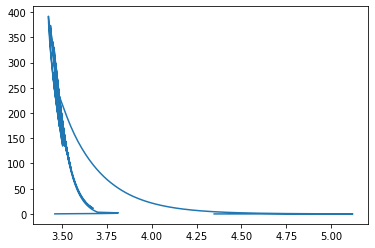

In [62]:
print(iso1.head())
plt.plot(iso1['logTeff'], iso1['radius'])

Text(0, 0.5, 'V [mag]')

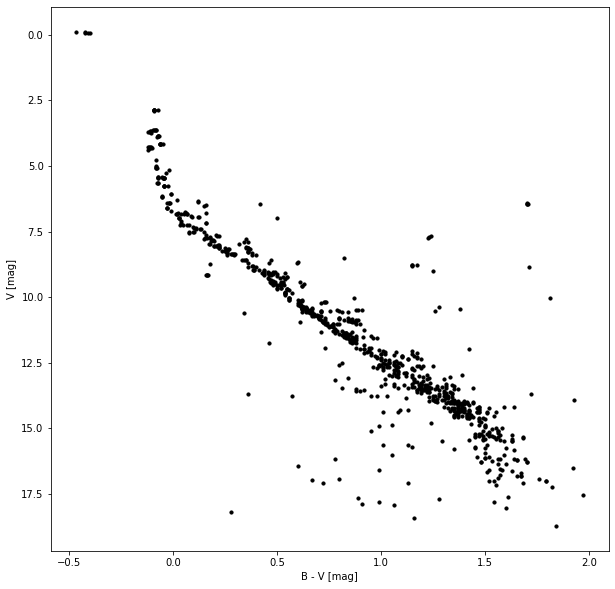

In [46]:
plt.figure(figsize=(10, 10))
plt.scatter(BV, V, s = 10, color = 'black')
plt.gca().invert_yaxis()
plt.xlabel('B - V [mag]'); plt.ylabel('V [mag]')

In [83]:
from isochrones import BinaryStarModel
from isochrones.utils import addmags


props_A

{'radius': 1.0024073595957388,
 'Mbol': 4.687917861788,
 'nu_max': 3069.483441621318,
 'logL': 0.020832855284800236,
 'logTeff': 3.7660247063306596,
 'mass': 0.9998647639419379,
 'feh': -0.012519050601435218,
 'logg': 4.435999146983706,
 'eep': 348.9796257019043,
 'density': 1.3994609102302025,
 'phase': 0.0,
 'initial_mass': 1.0,
 'delta_nu': 141.38238967974797,
 'Teff': 5834.782979719397,
 'interpolated': 0.0,
 'star_age': 3981105831.456894,
 'age': 9.599999663674296,
 'dt_deep': 0.013280718567296703,
 'J_mag': 12.179587871614814,
 'H_mag': 11.835728922815576,
 'K_mag': 11.787350220704182,
 'BP_mag': 13.620832649193208,
 'RP_mag': 12.758310445284703,
 'G_mag': 13.27380470559853,
 'distance': 500.0,
 'AV': 0.2,
 'initial_feh': 0.0,
 'requested_age': 9.6}